In [34]:
import numpy as np  # Importing NumPy library
import pandas as pd  # Importing Pandas library
import matplotlib.pyplot as plt  # Importing Matplotlib library's "pyplot" module
import seaborn as sns  # Imorting Seaborn library

import os

In [35]:
dataset = pd.read_csv("telemonitoring_parkinsons_updrs.data.csv")

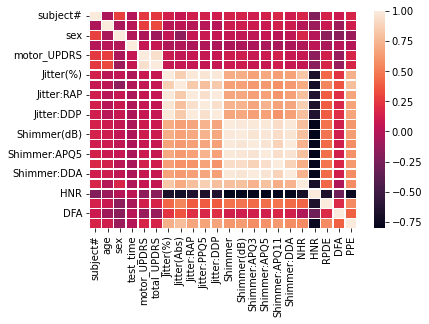

In [36]:
fig, axes = plt.subplots() 
sns.heatmap(data=dataset.corr(), annot=False, linewidths=.5, ax=axes) 
plt.show()

In [37]:
dataset = dataset.drop('subject#', axis=1) # Remove Subject Num
dataset = dataset.drop('motor_UPDRS', axis=1) # Remove Motor_UPDRS

In [38]:
y=dataset['total_UPDRS']
X=dataset.loc[:,dataset.columns!="total_UPDRS"]

In [39]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
import sklearn as tf
print(tf.__version__)

1.0.2


In [41]:
from sklearn.ensemble import GradientBoostingRegressor

GB_reg_model = GradientBoostingRegressor(n_estimators = 200, learning_rate = 1)
GB_reg_model.fit(x_train, y_train)


GradientBoostingRegressor(learning_rate=1, n_estimators=200)

In [42]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_predicted_train = GB_reg_model.predict(x_train)
y_predicted_test = GB_reg_model.predict(x_test)

accuracy_train = r2_score(y_train, y_predicted_train)
print("Training Accuracy for Boosted ", accuracy_train)

accuracy_test = r2_score(y_test, y_predicted_test)
print("Testing Accuracy for Boosted: ", accuracy_test)

RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_predicted_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_predicted_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

Training Accuracy for Boosted  0.9808205111964261
Testing Accuracy for Boosted:  0.8546768787139614
RMSE for Training Data:  1.4714483624114467
RMSE for Testing Data:  4.1901460859327715


In [43]:
predicted_value=y_predicted_test
true_value=y_test

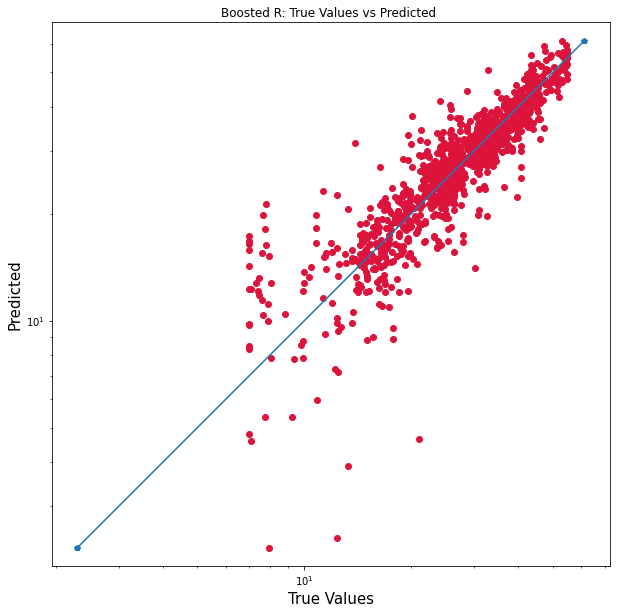

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'p-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("Boosted R: True Values vs Predicted ")
plt.axis('equal')
plt.show()